In [182]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
data = np.genfromtxt('data_ml.txt', delimiter='\t')
X, y = data[:, :3], data[:, 3]
y = y.astype(np.int)

print('X.shape:', X.shape)
print('y.shape:', y.shape)
X_train = X
y_train = y
print("X_train:", X_train)
print("Y_train:",y_train)


X.shape: (14, 3)
y.shape: (14,)
X_train: [[3.  0.2 1. ]
 [1.  0.3 1. ]
 [4.  0.5 1. ]
 [2.  0.7 1. ]
 [0.  1.  1. ]
 [1.  1.2 1. ]
 [1.  1.7 1. ]
 [6.  0.2 1. ]
 [7.  0.3 1. ]
 [6.  0.7 1. ]
 [3.  1.1 1. ]
 [2.  1.5 1. ]
 [4.  1.7 1. ]
 [2.  1.9 1. ]]
Y_train: [-1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1]


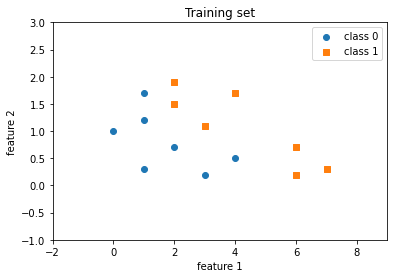

In [184]:
plt.scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-2, 9])
plt.ylim([-1, 3])
plt.legend()
plt.show()

In [185]:
class PLA():
    def __init__(self, weight1, weight2, weight3, learning_rate , iterations):
        self.weights = np.zeros((3, 1), dtype=np.float)
        self.weights [0][0] = weight1
        self.weights [1][0] = weight2
        self.weights [2][0] = weight3
        self.learning_rate = learning_rate
        self.iterations = iterations
        
        

    def forward(self, x):
        linear = np.dot(x, self.weights)
        print("linear:",linear)
        predictions = np.where(linear > 0 , 1, -1)
        print("predictions:",predictions)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y):
        i = 0
        while i < 14:
            print("\n X:",x[i])
            print("Y:",y[i])
            errors = self.backward(x[i].reshape(1, 3), y[i]).reshape(-1)
            print("weight1:\t",self.weights[0][0])
            print("weight2:\t",self.weights[1][0])
            print("weight3:\t",self.weights[2][0])
            print("errors:",errors)
            if errors != 0:
                self.weights += (self.learning_rate* y[i] * x[i]).reshape(3, 1)
                print("learning_rate* y[i] * x[i]:",self.learning_rate *y[i] * x[i])
                i = 0
                self.iterations += 1
            else:
                i = i+1
                continue
                self.iterations += 1
        
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy
                

In [186]:
ppn = PLA(weight1 = 0.2, weight2 =5.1 , weight3 = 2.3, learning_rate = 1 , iterations = 0)
ppn.train(X_train, y_train)

print('\n final Weights: %s\n' % ppn.weights)
print('\n iterations: %s\t ' % ppn.iterations )
train_acc = ppn.evaluate(X_train, y_train)
print('\n Train set accuracy: %.2f%%' % (train_acc*100))


 X: [3.  0.2 1. ]
Y: -1
linear: [[3.92]]
predictions: [[1]]
weight1:	 0.2
weight2:	 5.1
weight3:	 2.3
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-6.12]]
predictions: [[-1]]
weight1:	 -2.8
weight2:	 4.8999999999999995
weight3:	 1.2999999999999998
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-0.03]]
predictions: [[-1]]
weight1:	 -2.8
weight2:	 4.8999999999999995
weight3:	 1.2999999999999998
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-7.45]]
predictions: [[-1]]
weight1:	 -2.8
weight2:	 4.8999999999999995
weight3:	 1.2999999999999998
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-0.87]]
predictions: [[-1]]
weight1:	 -2.8
weight2:	 4.8999999999999995
weight3:	 1.2999999999999998
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[6.2]]
predictions: [[1]]
weight1:	 -2.8
weight2:	 4.8999999999999995
weight3:	 1.2999999999999998
errors: [-2]
learning_rate* y[i] * x[i]: [-0. -1. -1.]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-7.32]]
predictions: [[-1]]

predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-6.23]]
predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-6.6]]
predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-6.38]]
predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-6.33]]
predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[-5.48]]
predictions: [[-1]]
weight1:	 0.20000000000000018
weight2:	 0.09999999999999948
weight3:	 -6.7
errors: [2]
learning_rate* y[i] * x[i]: [6.  0.2 1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[12.96]]
predictions: [[1]]
weight1:	 6.2
weight2:	 0.2999999999999995
w

predictions: [[-1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-9.9]]
predictions: [[-1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-7.54]]
predictions: [[-1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-7.14]]
predictions: [[-1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[2.66]]
predictions: [[1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [7.  0.3 1. ]
Y: 1
linear: [[4.94]]
predictions: [[1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [6.  0.7 1. ]
Y: 1
linear: [[3.06]]
predictions: [[1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10.7
errors: [0]

 X: [3.  1.1 1. ]
Y: 1
linear: [[-3.22]]
predictions: [[-1]]
weight1:	 2.2
weight2:	 0.7999999999999998
weight3:	 -10

 X: [1.  0.3 1. ]
Y: -1
linear: [[-11.45]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-7.15]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-8.85]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-10.2]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-8.3]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-6.55]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.499999999999999
weight3:	 -13.7
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[-5.8]]
predictions: [[-1]]
weight1:	 1.2000000000000002
weight2:	 3.49999999999999

linear: [[-11.91]]
predictions: [[-1]]
weight1:	 1.1999999999999993
weight2:	 2.6999999999999993
weight3:	 -17.7
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[-9.96]]
predictions: [[-1]]
weight1:	 1.1999999999999993
weight2:	 2.6999999999999993
weight3:	 -17.7
errors: [2]
learning_rate* y[i] * x[i]: [6.  0.2 1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[5.48]]
predictions: [[1]]
weight1:	 7.199999999999999
weight2:	 2.8999999999999995
weight3:	 -16.7
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-4.56]]
predictions: [[-1]]
weight1:	 4.199999999999999
weight2:	 2.6999999999999993
weight3:	 -17.7
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-12.69]]
predictions: [[-1]]
weight1:	 4.199999999999999
weight2:	 2.6999999999999993
weight3:	 -17.7
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[0.45]]
predictions: [[1]]
weight1:	 4.199999999999999
weight2:	 2.6999999999999993
weight3:	 -17.7
errors: [-2]
learning_rate* y[i] * x[i]: [-4.  -0.5 -1. ]

 X:

errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-2.55]]
predictions: [[-1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-7.61]]
predictions: [[-1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-12.]]
predictions: [[-1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-7.46]]
predictions: [[-1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-4.11]]
predictions: [[-1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[1.84]]
predictions: [[1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [7.  0.3 1. ]
Y: 1
linear: [[5.71]]
predictions: [[1]]
weight1:	 3.1999999999999993
weight2:	 6.7
weight3:	 -18.7
errors: [0]

 X: [6.  0.7 1. ]
Y: 1
linear: [[5.19]]
predictions: [[1]]


In [187]:
ppn = PLA(weight1 = 1.0, weight2 =1.0 , weight3 = 1.0, learning_rate = 1, iterations = 0)
ppn.train(X_train, y_train)
                    
print('\n final Weights: %s\n' % ppn.weights)
print('\n iterations: %s\t ' % ppn.iterations )


 X: [3.  0.2 1. ]
Y: -1
linear: [[4.2]]
predictions: [[1]]
weight1:	 1.0
weight2:	 1.0
weight3:	 1.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-5.84]]
predictions: [[-1]]
weight1:	 -2.0
weight2:	 0.8
weight3:	 0.0
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-1.76]]
predictions: [[-1]]
weight1:	 -2.0
weight2:	 0.8
weight3:	 0.0
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-7.6]]
predictions: [[-1]]
weight1:	 -2.0
weight2:	 0.8
weight3:	 0.0
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-3.44]]
predictions: [[-1]]
weight1:	 -2.0
weight2:	 0.8
weight3:	 0.0
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[0.8]]
predictions: [[1]]
weight1:	 -2.0
weight2:	 0.8
weight3:	 0.0
errors: [-2]
learning_rate* y[i] * x[i]: [-0. -1. -1.]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-7.04]]
predictions: [[-1]]
weight1:	 -2.0
weight2:	 -0.19999999999999996
weight3:	 -1.0
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-3.06]]
predictions: [[-1]]
weight1:	 -2.0


linear: [[-7.05]]
predictions: [[-1]]
weight1:	 0.0
weight2:	 -1.5
weight3:	 -6.0
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-7.5]]
predictions: [[-1]]
weight1:	 0.0
weight2:	 -1.5
weight3:	 -6.0
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-7.8]]
predictions: [[-1]]
weight1:	 0.0
weight2:	 -1.5
weight3:	 -6.0
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-8.55]]
predictions: [[-1]]
weight1:	 0.0
weight2:	 -1.5
weight3:	 -6.0
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[-6.3]]
predictions: [[-1]]
weight1:	 0.0
weight2:	 -1.5
weight3:	 -6.0
errors: [2]
learning_rate* y[i] * x[i]: [6.  0.2 1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[12.74]]
predictions: [[1]]
weight1:	 6.0
weight2:	 -1.3
weight3:	 -5.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[2.7]]
predictions: [[1]]
weight1:	 3.0
weight2:	 -1.5
weight3:	 -6.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-7.34]]
predictions: [[-1]]
weight

weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-8.96]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-9.36]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[1.84]]
predictions: [[1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [7.  0.3 1. ]
Y: 1
linear: [[3.76]]
predictions: [[1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [6.  0.7 1. ]
Y: 1
linear: [[1.44]]
predictions: [[1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [0]

 X: [3.  1.1 1. ]
Y: 1
linear: [[-4.88]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 -0.7999999999999998
weight3:	 -10.0
errors: [2]
learning_rate* y[i] * x[i]: [3.  1.1 1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[6.06]]
predictions: [[1]]
weight1:	 5.0
weight2:	 0

linear: [[13.04]]
predictions: [[1]]
weight1:	 7.0
weight2:	 5.200000000000001
weight3:	 -9.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[3.]]
predictions: [[1]]
weight1:	 4.0
weight2:	 5.000000000000001
weight3:	 -10.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-7.04]]
predictions: [[-1]]
weight1:	 1.0
weight2:	 4.800000000000001
weight3:	 -11.0
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-8.56]]
predictions: [[-1]]
weight1:	 1.0
weight2:	 4.800000000000001
weight3:	 -11.0
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-4.6]]
predictions: [[-1]]
weight1:	 1.0
weight2:	 4.800000000000001
weight3:	 -11.0
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-5.64]]
predictions: [[-1]]
weight1:	 1.0
weight2:	 4.800000000000001
weight3:	 -11.0
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-6.2]]
predictions: [[-1]]
weight1:	 1.0
weight2:	 4.800000000000001
weight3:	 -11.0
errors: [0]

 X: [1.  1.2

linear: [[0.86]]
predictions: [[1]]
weight1:	 5.0
weight2:	 4.3
weight3:	 -15.0
errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-9.18]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-12.77]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-5.95]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-9.13]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-11.9]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-9.08]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-7.03]]
predictions: [[-1]]
weight1:	 2.0
weight2:	 4.1
weight3:	 -16.0
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear:

errors: [-2]
learning_rate* y[i] * x[i]: [-3.  -0.2 -1. ]

 X: [3.  0.2 1. ]
Y: -1
linear: [[-7.84]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [1.  0.3 1. ]
Y: -1
linear: [[-13.26]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [4.  0.5 1. ]
Y: -1
linear: [[-3.1]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [2.  0.7 1. ]
Y: -1
linear: [[-7.94]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [0. 1. 1.]
Y: -1
linear: [[-12.2]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [1.  1.2 1. ]
Y: -1
linear: [[-8.04]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [1.  1.7 1. ]
Y: -1
linear: [[-5.14]]
predictions: [[-1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: [0]

 X: [6.  0.2 1. ]
Y: 1
linear: [[1.16]]
predictions: [[1]]
weight1:	 3.0
weight2:	 5.8
weight3:	 -18.0
errors: 